## YOLOv5 network:
####  Real-Time Image Processing

Using the YOLOv5 network for image processing with detection and classification in real time using a custom database with classes created with the LabelImg tool.

For this development, I created a database using photos from some friends, my beloved wife and mine. Feel comfortable to create your own database of images and classes... have fun!

> At first, create a suitable virtual environment for the development of the system, create, in the same directory where the ipynb file is located, the following folders /data/images and /data/labels (or use whatever name you want, just don't get lost!).

> Set aside an adequate amount of photos for training (it is important that there are the same amount of photos for all classes that you will create with labelImg). Try to use good photos for classification.

Now.. let's get started!!!

##### Download and Install Dependencies

In [1]:
!pip3 install torch torchvision torchaudio

In [2]:
!git clone https://github.com/ultralytics/yolov5

fatal: destination path 'yolov5' already exists and is not an empty directory.


In [3]:
# Pay attention to change yolov5 directory
!pip install -r yolov5/requirements.txt

##### Import Libraries

In [4]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

C:\Users\g.monego\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


##### Testing Yolov5 Model

In [5]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')

Using cache found in C:\Users\g.monego/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2022-8-27 Python-3.10.6 torch-1.12.1+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [9]:
img = 'https://quatrorodas.abril.com.br/wp-content/uploads/2021/04/Tr%C3%A3nsito.jpg?quality=70&strip=info'
results = model(img)
results.print()

image 1/1: 682x1024 11 persons, 21 cars, 7 motorcycles, 1 truck
Speed: 545.7ms pre-process, 250.5ms inference, 1.0ms NMS per image at shape (1, 3, 448, 640)


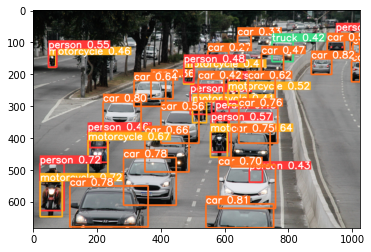

In [10]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [86]:
#import uuid   # Unique identifier
#import os
#import time

##### Download LabelImg and Install resources.qrc

In [50]:
!git clone https://github.com/tzutalin/labelImg


fatal: destination path 'labelImg' already exists and is not an empty directory.


In [11]:
!pip install pyqt5 lxml --upgrade


In [13]:
# To run labelImg.py, first enter the entire path where pyrcc5 is stored, ex:
# C:/Users/user/Local/.../Python310/Scripts/pyrcc5 -o libs/resources.py resources.qrc

!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

# Then, in your cmd, go to the labelImg directory and run "python labelImg.py"
# So, the program will run... get fun and label!

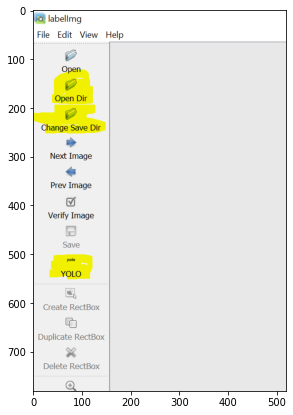

In [25]:
import skimage.io

labelImg = 'labelimg.png'
image = skimage.io.imread(labelImg)
plt.figure(figsize=(7,7))
plt.imshow(image)

To create the labels, create a directory (if it doesn't exist) under the data folder.
As per the image, select Open Dir to enter the images directory, then select Change Save Dir to ensure the labels files will be stored in the correct folder.

Make sure the YOLO setting is checked, otherwise the system will not work.

// Keep Calm and LabelIt!! //


Before starting the training, create a file "dataset.yml" inside the yolov5 folder.
Go to Ultralytics GitHub via <https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data> about custom data, and copy the code presented in 1.1 Create dataset.yaml.
Paste the code in the dataset.yml file and change the path, train and val parameters to match your configuration

Then go to the labels folder created earlier and look for the file classes.txt.

In this file there will be the classes created during the creation of the labels.

See the number of classes, create a variable "nc: " in the dataset.yml file and enter that number. Then, copy all the classes and create a list in the "names: " parameter of dataset.yml by inserting them all, and organizing them so that they are on one line...

As the example:

> path: ../data

> train: images

>val: images 

>nc: 21

>names: ['dog','person','cat','tv','car','meatballs','marinara sauce', 'tomato soup','chicken noodle soup','french onion soup','chicken breast','ribs','pulled pork','hamburger','cavity','TheMaster','AgroBoy','Boi','Caveirinha','Fininho','TheQueen']

Once this is done, we can start training the network.

##### Network Training

For my training, I chose to do it with only 500 epochs, but change the hyperparameter according to your time and processing condition

In [26]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

^C


The training will be stored inside yolov5/runs/train/ as /exp1,2,3... As many as you make.

Inside the exp folder of the ongoing training, a series of files will be created to visualize the evolution of the training. One of the files for monitoring is "results.csv", which will present the evolution of the training in real time, showing the epochs, loss and precision.

The training can be terminated when it is accurate enough, without having to wait for all epochs to be created.

#### Load Model

Let's load the custom template. Pay attention to change the path variable if necessary.

In [27]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp/weights/last.pt', force_reload=True)

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\g.monego/.cache\torch\hub\master.zip
YOLOv5  2022-8-28 Python-3.10.6 torch-1.12.1+cpu CPU

Fusing layers... 
Model summary: 213 layers, 7066762 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


With the model loaded, Let's show some images never seen on the net and see how it will behave.

In [115]:
img1 = os.path.join('data', 'TestingImages', '20210402_084455.jpg')
results = model(img1)
results.print()

image 1/1: 2472x3296 1 TheMaster, 1 TheQueen
Speed: 86.9ms pre-process, 273.9ms inference, 1.0ms NMS per image at shape (1, 3, 480, 640)


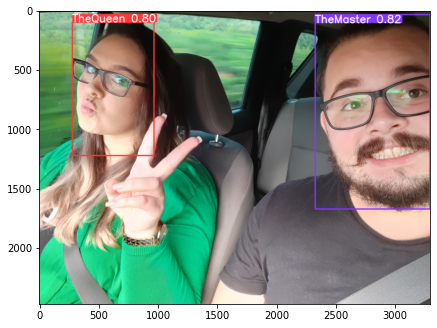

In [116]:
%matplotlib inline
plt.figure(figsize=(7,7)) 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [117]:
img2 = os.path.join('data', 'TestingImages', 'IMG-20220826-WA0026.jpg')
results = model(img2)
results.print()

image 1/1: 381x344 1 Boi, 1 Caveirinha, 1 Fininho
Speed: 15.8ms pre-process, 371.7ms inference, 1.0ms NMS per image at shape (1, 3, 640, 608)


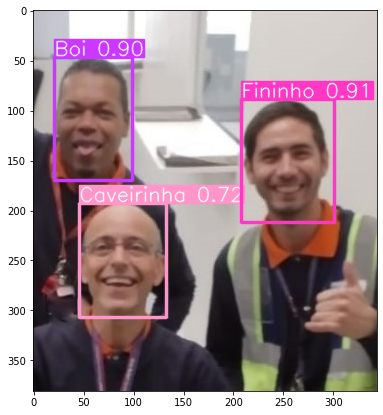

In [118]:
%matplotlib inline
plt.figure(figsize=(7,7)) 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [125]:
img3 = os.path.join('data', 'TestingImages', '20220501_155401.jpg')
results = model(img3)
results.print()

image 1/1: 2396x2268 1 TheQueen
Speed: 52.3ms pre-process, 278.0ms inference, 1.0ms NMS per image at shape (1, 3, 640, 608)


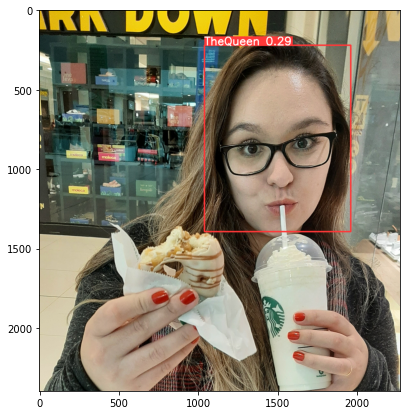

In [127]:
%matplotlib inline
plt.figure(figsize=(7,7)) 
plt.imshow(np.squeeze(results.render()))
plt.show()

### She is so beautiful!!!!! <3 ###

As we have seen, the network is working well! Of course, to have an even more accurate result, and with more complex image recognition, it requires a larger number of samples for training and a larger number of epochs.
Still... this one worked! Let's be happy, that's what matters, right?! ...

#### Real Time Recognition

The scipt below uses the VideoCapture function of the OpenCV library, this allows us to use the machine's WebCam for real-time recognition. Also, if you want to perform video recognition, just replace the parameter cv2.VideoCapture(0) - 0 is the hardware activation, it may be different on your machine.. - by the video path in your directory.. ex:
>  cv2. VideoCapture("data/video/video.mp4")

---

> !!!Observation!!!

This script may not work if you are using Colab, requiring the use of other libraries to allow Colab to use the machine's hardware.

---

In [128]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()